In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [161]:
pd.options.display.max_rows
autos1 = pd.read_csv('autos.csv')

In [162]:
autos1.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [163]:
autos1.columns.value_counts()

price                  1
powerPS                1
yearOfRegistration     1
postalCode             1
abtest                 1
brand                  1
fuelType               1
model                  1
monthOfRegistration    1
notRepairedDamage      1
seller                 1
lastSeen               1
index                  1
kilometer              1
vehicleType            1
name                   1
nrOfPictures           1
gearbox                1
dateCrawled            1
dateCreated            1
offerType              1
dtype: int64

In [608]:
autos = pd.DataFrame()

In [609]:
autos['price'] = autos1['price']
autos['kilometer'] = autos1['kilometer']
autos['gearbox'] = autos1['gearbox']
autos['yearOfRegistration'] = autos1['yearOfRegistration']
autos['notRepairedDamage'] = autos1['notRepairedDamage']
autos['brand'] = autos1['brand']
autos['fuelType'] = autos1['fuelType']
autos['vehicleType'] = autos1['vehicleType']
#autos['postalCode'] = autos1['postalCode']

In [610]:
autos = autos.dropna()

In [611]:
autos

,price,kilometer,gearbox,yearOfRegistration,notRepairedDamage,brand,fuelType,vehicleType
1,18300,125000,manuell,2011,ja,audi,diesel,coupe
3,1500,150000,manuell,2001,nein,volkswagen,benzin,kleinwagen
4,3600,90000,manuell,2008,nein,skoda,diesel,kleinwagen
5,650,150000,manuell,1995,ja,bmw,benzin,limousine
6,2200,150000,manuell,2004,nein,peugeot,benzin,cabrio
...,...,...,...,...,...,...,...,...
371520,3200,150000,manuell,2004,ja,seat,benzin,limousine
371521,1150,150000,manuell,2000,nein,opel,benzin,bus
371524,1199,125000,automatik,2000,nein,smart,benzin,cabrio
371525,9200,150000,manuell,1996,nein,volkswagen,diesel,bus


In [612]:
autos['vehicleType'].value_counts()

limousine     78160
kleinwagen    60706
kombi         54451
bus           25501
cabrio        19203
coupe         15334
suv           12675
andere         1982
Name: vehicleType, dtype: int64

In [613]:
autos['fuelType'].value_counts().index

Index(['benzin', 'diesel', 'lpg', 'cng', 'hybrid', 'andere', 'elektro'], dtype='object')

In [614]:
top_brands = ['volkswagen', 'bmw', 'mercedes_benz', 'opel', 'audi', 'ford']

In [615]:
autos = autos[autos['brand'].isin(top_brands)]

In [616]:
autos = autos.head(10000)

In [617]:
autos

,price,kilometer,gearbox,yearOfRegistration,notRepairedDamage,brand,fuelType,vehicleType
1,18300,125000,manuell,2011,ja,audi,diesel,coupe
3,1500,150000,manuell,2001,nein,volkswagen,benzin,kleinwagen
5,650,150000,manuell,1995,ja,bmw,benzin,limousine
7,0,40000,manuell,1980,nein,volkswagen,benzin,limousine
11,2799,150000,manuell,2005,ja,volkswagen,diesel,kombi
...,...,...,...,...,...,...,...,...
20414,4500,150000,automatik,2000,nein,bmw,benzin,limousine
20415,8500,150000,automatik,2005,ja,bmw,diesel,kombi
20416,2290,150000,manuell,1999,nein,bmw,lpg,limousine
20418,12450,80000,manuell,2008,nein,bmw,benzin,coupe


In [618]:
autos['gearbox'].replace({'manuell','automatik'}, {0,1}, inplace=True)
autos['notRepairedDamage'].replace({'ja','nein'}, {0,1}, inplace=True)
autos['fuelType'].replace({'benzin', 'diesel', 'lpg', 'cng', 'andere', 'elektro','hybrid'}, {1,2,3,4,5,6,7}, inplace=True)
autos['vehicleType'].replace({'limousine', 'kombi', 'kleinwagen', 'bus', 'coupe', 'cabrio', 'suv', 'andere'}, {1,2,3,4,5,6,7,8}, inplace=True)

In [619]:
corr = autos.corr().round(2)

<AxesSubplot:>

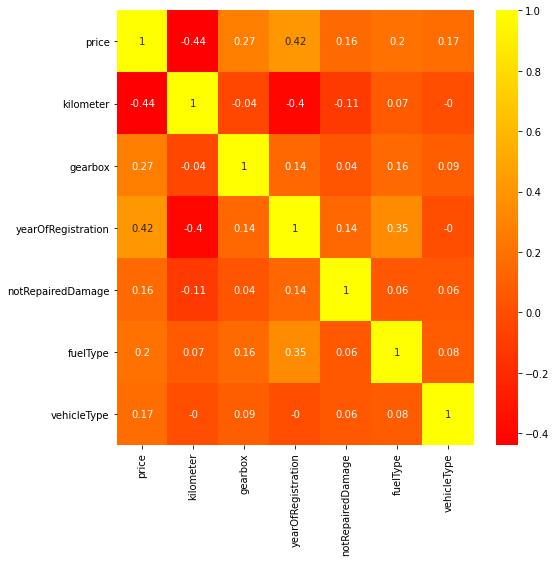

In [620]:
fig, axes = plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='autumn')

In [621]:
autos['brand'].replace({'volkswagen', 'bmw', 'mercedes_benz', 'opel', 'audi', 'ford'}, {1,2,3,4,5,6}, inplace=True)

In [622]:
autos

,price,kilometer,gearbox,yearOfRegistration,notRepairedDamage,brand,fuelType,vehicleType
1,18300,125000,0,2011,0,6,5,8
3,1500,150000,0,2001,1,3,3,1
5,650,150000,0,1995,0,4,3,4
7,0,40000,0,1980,1,3,3,4
11,2799,150000,0,2005,0,3,5,3
...,...,...,...,...,...,...,...,...
20414,4500,150000,1,2000,1,4,3,4
20415,8500,150000,1,2005,0,4,5,3
20416,2290,150000,0,1999,1,4,2,4
20418,12450,80000,0,2008,1,4,3,8


In [623]:
autos.isnull().value_counts()

price  kilometer  gearbox  yearOfRegistration  notRepairedDamage  brand  fuelType  vehicleType
False  False      False    False               False              False  False     False          10000
dtype: int64

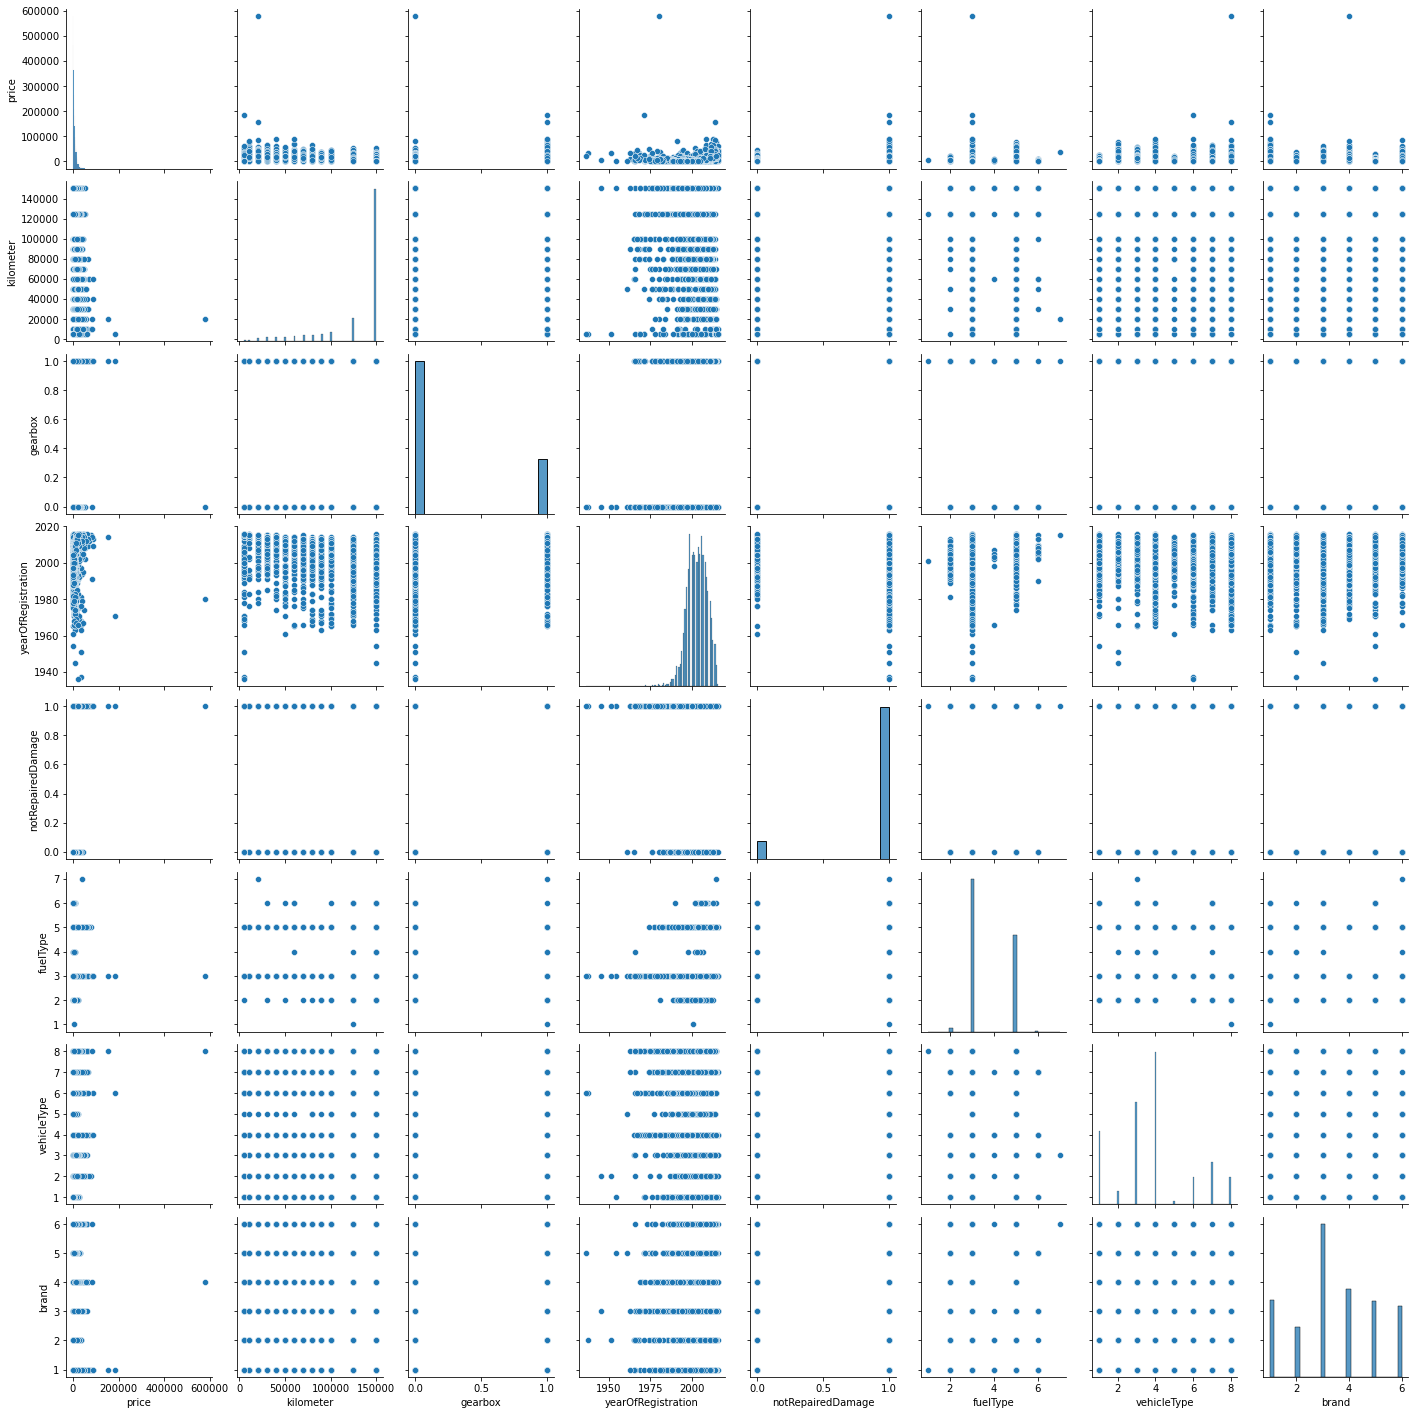

In [292]:
sns.pairplot(autos)

<AxesSubplot:>

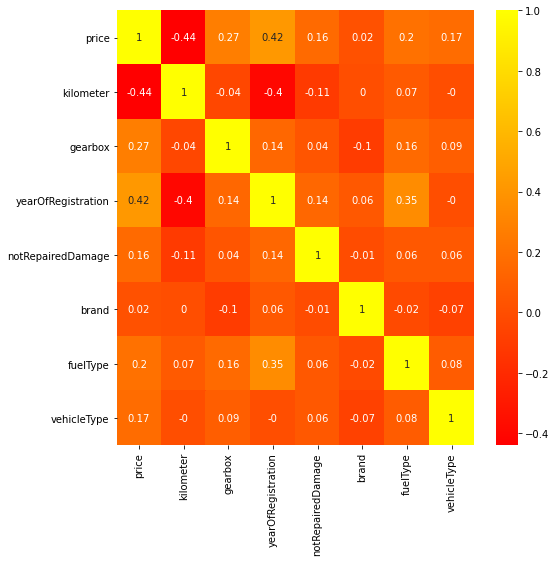

In [624]:
corr = autos.corr().round(2)
fig, axes = plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='autumn')

In [625]:
autos

,price,kilometer,gearbox,yearOfRegistration,notRepairedDamage,brand,fuelType,vehicleType
1,18300,125000,0,2011,0,6,5,8
3,1500,150000,0,2001,1,3,3,1
5,650,150000,0,1995,0,4,3,4
7,0,40000,0,1980,1,3,3,4
11,2799,150000,0,2005,0,3,5,3
...,...,...,...,...,...,...,...,...
20414,4500,150000,1,2000,1,4,3,4
20415,8500,150000,1,2005,0,4,5,3
20416,2290,150000,0,1999,1,4,2,4
20418,12450,80000,0,2008,1,4,3,8


In [626]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [627]:
data = autos.drop('price', axis=1)
target = autos['price']

In [628]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [629]:
numerical_list=['kilometer', 'yearOfRegistration', 'fuelType']
categorical_list=['gearbox', 'notRepairedDamage', 'brand','vehicleType']
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

In [630]:
transformer = ColumnTransformer([('num', num_transformer, numerical_list), ('cat', cat_transformer, categorical_list)])

In [631]:
test_data, train_data, test_target, train_target = train_test_split(data, target, test_size=0.8, random_state=1)
train_data.shape, test_data.shape, train_target.shape, test_target.shape

((8000, 7), (2000, 7), (8000,), (2000,))

In [632]:
model_linear_regression = Pipeline([('transformer', transformer),
                                   ('linear_regression', linear_regression)])

In [633]:
model_linear_regression.fit(train_data, train_target)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['kilometer',
                                                   'yearOfRegistration',
                                                   'fuelType']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['gearbox',
                                                   'notRepairedDamage', 'brand',
                                                   'vehicleType'])])),
                ('linear_regression', LinearRegression())])

In [650]:
prueba_data = test_data.iloc[:40]
m = model_linear_regression.predict(prueba_data)
np.abs(m)

array([ 1568., 13712., 11984.,  5968.,  6496.,  3432.,  3472.,  5824.,
        4544., 17736.,   592.,  2712.,  9312., 14064., 19424.,  4176.,
        5024.,    32.,  4800., 17296.,  2256., 11240., 12256.,  2104.,
       12064., 14784.,  2288.,  4256.,  7264.,  4160.,   352.,  6512.,
       11688.,  2664., 14248.,  6952.,  4256.,  4296.,  2992.,  6584.])

In [651]:
lst = list(test_target.iloc[:40])
lst

[1400,
 12990,
 27500,
 1100,
 3100,
 3999,
 1800,
 3200,
 1990,
 18600,
 2000,
 1100,
 5890,
 11400,
 20000,
 200,
 6250,
 400,
 1299,
 14900,
 1099,
 16900,
 13800,
 1200,
 3500,
 22900,
 6000,
 4700,
 2990,
 1950,
 500,
 4500,
 15700,
 549,
 6999,
 3100,
 4900,
 3990,
 5950,
 7385]

In [652]:
r = np.abs(m-lst)
r.mean()

2941.15

In [653]:
x = np.linspace(0,40,40)

(0.0, 10000.0)

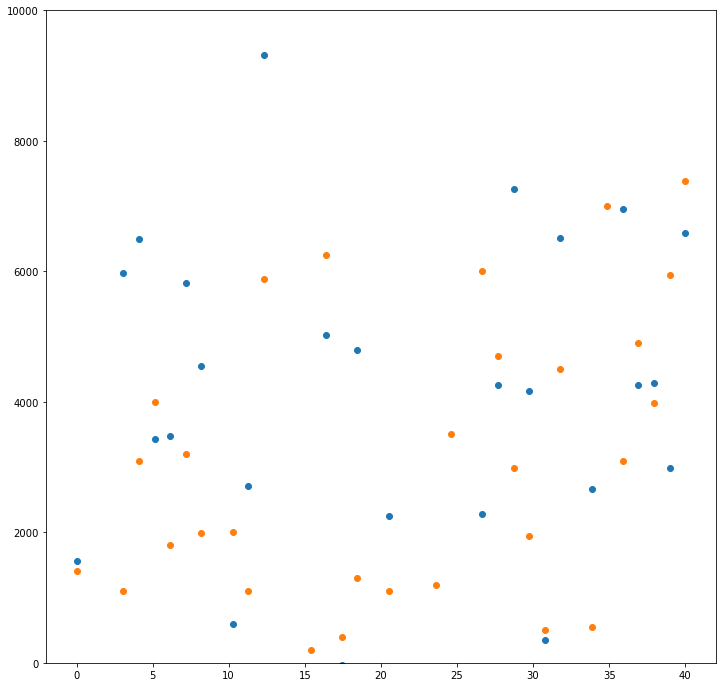

In [654]:
fig, axes = plt.subplots(figsize=(12,12))

axes.scatter(x, m)
axes.scatter(x,lst)

plt.ylim(0,10000)

In [649]:
model_linear_regression

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['kilometer',
                                                   'yearOfRegistration',
                                                   'fuelType']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['gearbox',
                                                   'notRepairedDamage', 'brand',
                                                   'vehicleType'])])),
                ('linear_regression', LinearRegression())])